### Final architecture of AnchorGK based on real-world datasets.

In [83]:
import os
import numpy as np
import six.moves.cPickle as pickle
import torch
import torch.nn as nn
import torch.utils.data as data
import os
import pandas as pd
import torch
from MOESTKF_functions import Toy_generation, get_complete_stations, Feature_wise_Subgraph
from MOESTKF_functions import *

Data processing

In [84]:
#Run the following code for NDBC dataset--station_value.shape=torch.Size([103, 8784, 8])；station_info.shape=(103, 3)

In [85]:
# Example usage
file_path = 'data/NDBC/all.npy'
station_value = np.load(file_path)
station_value = station_value.transpose(2, 0, 1)
station_value = station_value[:, :, 5:13]
station_value = torch.tensor(station_value)

lat_file_path = 'data/NDBC/Station_info_edit.csv'
station_info = pd.read_csv(lat_file_path, header=None).values  # Convert to NumPy array directly

station_value= torch.tensor(station_value)  # Assuming station_values is your tensor
print("station_value.shape:",station_value.shape)

station_value.shape: torch.Size([103, 8784, 8])


/tmp/ipykernel_37740/2749581733.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  station_value= torch.tensor(station_value)  # Assuming station_values is your tensor


In [86]:
#Run the following code for Tehiku dataset--station_value.shape=torch.Size([24, 71140, 5])；station_info.shape=(24, 3)
#Don't delete--->Carefully!!!!

In [87]:
# lat_file_path = 'data/Tehiku/COORD.xlsx'
# station_info = pd.read_excel(lat_file_path).values 
# # Step 1: Define the directory containing the Excel files
# directory_path = 'data/Tehiku/value'
# 
# # Step 2: List all Excel files in the directory and sort them
# xlsx_files = [file for file in os.listdir(directory_path) if file.endswith('.xlsx')]
# sorted_xlsx_files = sorted(xlsx_files)  # Sort files alphabetically
# 
# # Step 3: Initialize a list to hold the data from each Excel file
# data_list = []
# 
# # Step 4: Iterate through each Excel file and read its contents
# for xlsx_file in sorted_xlsx_files:
#     # Concatenate directory path with filename
#     file_path = os.path.join(directory_path, xlsx_file)
#     
#     try:
#         # Read the Excel file using pandas
#         xl = pd.ExcelFile(file_path)
#         
#         # Initialize a list to hold data from each sheet
#         sheet_data_list = []
#         
#         # Iterate through each sheet in the Excel file
#         for sheet_name in xl.sheet_names:
#             sheet_data = xl.parse(sheet_name)
#             
#             # Example: Select numeric columns to convert to NumPy array
#             numeric_columns = ['10cm', '30cm', '60cm', '100cm', 'Temp_30cm']
#             numeric_data = sheet_data[numeric_columns].values.astype(np.float32)
#             
#             # Append data to the list for this sheet
#             sheet_data_list.append(numeric_data)
#         
#         # Stack data for each sheet along a new axis (axis=0)
#         stacked_data = np.stack(sheet_data_list, axis=0)
#         
#         # Append stacked data to the main list
#         data_list.append(stacked_data)
#         
#     except pd.errors.EmptyDataError:
#         print(f"Warning: File {xlsx_file} is empty.")
#     except Exception as e:
#         print(f"Error occurred while reading {xlsx_file}: {e}")
# 
# # Step 5: Stack the NumPy arrays into a single 3D tensor
# if data_list:
#     tensor_data = np.stack(data_list, axis=0)  # Stack along axis 0 (files)
#     tensor_data = torch.tensor(tensor_data)   # Convert to PyTorch tensor
#     station_value = tensor_data.squeeze(dim=1)  # Squeeze along the second dimension
#     print("Shape of tensor data:", station_value.shape)
# else:
#     print("No valid data found.")

In [88]:
#Run the following code for Shenzhen dataset---torch.Size([10, 7296, 6])，torch.Size([10,3])
#Don't delete--->Carefully!!!!

In [89]:
# import os
# import pandas as pd
# import numpy as np
# import torch
# 
# # Step 1: Define the directory containing the CSV files
# directory_path = 'data/Shenzhen/Value'
# 
# # Step 2: List all CSV files in the directory
# csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
# 
# # Step 3: Initialize a list to hold the data from each CSV file
# data_list = []
# 
# # Step 4: Iterate through each CSV file and read its contents
# for csv_file in csv_files:
#     # Concatenate directory path with filename
#     file_path = os.path.join(directory_path, csv_file)
#     
#     # Read the CSV file using pandas
#     try:
#         data = pd.read_csv(file_path)
#         
#         # Convert data to NumPy array of float32 (assuming all data is numeric)
#         data_np = data.values.astype(np.float32)
#         
#         # Append data to the list
#         data_list.append(data_np)
#         
#     except pd.errors.EmptyDataError:
#         print(f"Warning: File {csv_file} is empty.")
#     except Exception as e:
#         print(f"Error occurred while reading {csv_file}: {e}")
# 
# # Step 5: Stack the NumPy arrays into a single tensor
# if data_list:
#     station_value = torch.tensor(np.stack(data_list))
#     print("Shape of data tensor:", station_value.shape)
# else:
#     print("No valid data found.")
# lat_file_path = 'data/Shenzhen/Station.csv'
# station_info = pd.read_csv(lat_file_path).values
                         

Step 1). Distribution generation of subgraph and spatial correlation.

Complete_Sub_matrix.shape (35, 8, 6)


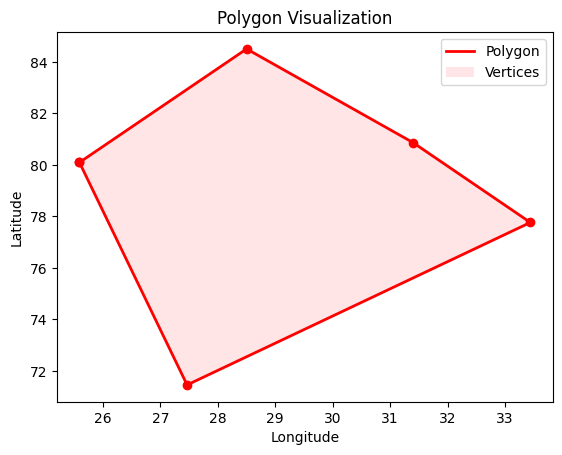

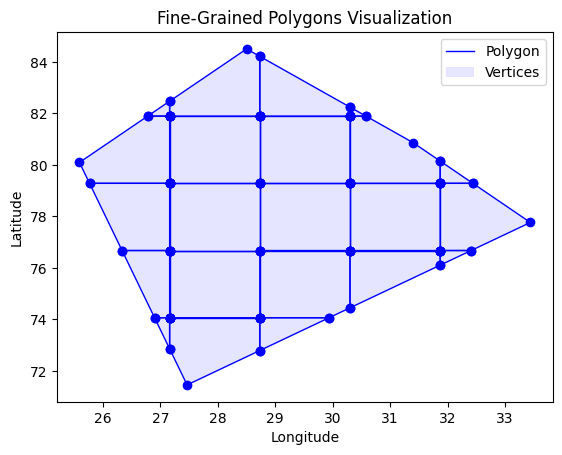

polygon_matrices[0,0][0] [[1.         0.52396587 0.40354786 0.31211338 0.3041555  0.28942888
  0.80417963]
 [0.52396587 1.         0.32757604 0.46199529 0.35184127 0.26601674
  0.23874634]
 [0.40354786 0.32757604 1.         0.14060828 0.30304809 0.49054627
  0.56566328]
 [0.31211338 0.46199529 0.14060828 1.         0.29583635 0.16326784
  0.31143837]
 [0.3041555  0.35184127 0.30304809 0.29583635 1.         0.25178827
  0.2211398 ]
 [0.28942888 0.26601674 0.49054627 0.16326784 0.25178827 1.
  0.59688472]
 [0.80417963 0.23874634 0.56566328 0.31143837 0.2211398  0.59688472
  1.        ]]


In [90]:
from MOESTKF_functions import Toy_generation, get_complete_stations, Feature_wise_Subgraph
import os
import numpy as np
import six.moves.cPickle as pickle
import torch
import torch.nn as nn
import torch.utils.data as data
import os
import pandas as pd
import torch
import random
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from shapely.ops import unary_union
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean
import random
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import numpy as np
from shapely.ops import unary_union
from scipy.stats import pearsonr
##############################
#1. Input: Toy example generation #Can be replaced by other datasets here.
##############################
# Example usage


complete_stations, complete_indices = get_complete_stations(station_info, station_value)
K = 5
subgraph_matrix = Feature_wise_Subgraph(station_info, station_value, complete_stations, complete_indices, K)#Subgraph Matrix: (16, 8)

# print("Feature-wise Subgraph Matrix:")
# print(subgraph_matrix.shape)#Feature-wise Subgraph Matrix: (16, 8)

# Initialize the new matrix with the desired shape
complete_sub_matrix = np.empty((subgraph_matrix.shape[0], subgraph_matrix.shape[1], 6), dtype=object)

# Fill the new matrix
for i, complete_station in enumerate(complete_stations):
    for j in range(subgraph_matrix.shape[1]):
        complete_sub_matrix[i, j] = np.insert(subgraph_matrix[i, j], 0, complete_station)

# Example output for verification
print("Complete_Sub_matrix.shape",complete_sub_matrix.shape)



# Convert station_info to a dictionary for easy lookup
station_coords = {row[0]: (float(row[1]), float(row[2])) for row in station_info}


def convex_hull(points):
    if len(points) < 3:
        return points  # Convex hull is not defined for fewer than 3 points
    hull = ConvexHull(points)
    return [points[vertex] for vertex in hull.vertices]


def create_polygon_matrix(complete_sub_matrix, station_coords):
    complete_sub_polygon = np.empty((complete_sub_matrix.shape[0], complete_sub_matrix.shape[1]), dtype=object)
    for i in range(complete_sub_matrix.shape[0]):
        for j in range(complete_sub_matrix.shape[1]):
            stations = complete_sub_matrix[i, j]
            coords = [station_coords[station] for station in stations if station in station_coords]
            if len(coords) > 2:
                hull_coords = convex_hull(coords)
                complete_sub_polygon[i, j] = Polygon(hull_coords)
            else:
                complete_sub_polygon[i, j] = Polygon(coords)
    return complete_sub_polygon


# Generate the Complete_Sub_polygon matrix
Complete_Sub_polygon = create_polygon_matrix(complete_sub_matrix, station_coords)

# Example usage: plot the first polygon in the matrix
polygon = Complete_Sub_polygon[0, 0]


def plot_polygon(polygon):
    fig, ax = plt.subplots()
    if polygon.is_valid:
        x, y = polygon.exterior.xy
        ax.plot(x, y, 'r-', lw=2)
        ax.fill(x, y, 'red', alpha=0.1)
        ax.scatter(x, y, color='red')

    ax.set_title('Polygon Visualization')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(['Polygon', 'Vertices'])
    plt.show()


# Plot the first polygon
plot_polygon(polygon)


def subdivide_polygon(polygon, num_subdivisions):
    minx, miny, maxx, maxy = polygon.bounds
    width = (maxx - minx) / num_subdivisions
    height = (maxy - miny) / num_subdivisions
    sub_polygons = []
    for i in range(num_subdivisions):
        for j in range(num_subdivisions):
            sub_poly = Polygon([
                (minx + i * width, miny + j * height),
                (minx + (i + 1) * width, miny + j * height),
                (minx + (i + 1) * width, miny + (j + 1) * height),
                (minx + i * width, miny + (j + 1) * height)
            ])
            if sub_poly.intersects(polygon):
                sub_polygons.append(sub_poly.intersection(polygon))
    return sub_polygons


def create_fine_grained_polygons(Complete_Sub_polygon, num_subdivisions):
    fine_grained_polygons = np.empty_like(Complete_Sub_polygon, dtype=object)
    for i in range(Complete_Sub_polygon.shape[0]):
        for j in range(Complete_Sub_polygon.shape[1]):
            coarse_polygon = Complete_Sub_polygon[i, j]
            if coarse_polygon.is_valid:
                fine_polygons = subdivide_polygon(coarse_polygon, num_subdivisions)
                fine_grained_polygons[i, j] = fine_polygons
    return fine_grained_polygons


# Generate the fine-grained polygons
num_subdivisions = 5  # Adjust this as needed for finer or coarser subdivisions
fine_grained_polygons = create_fine_grained_polygons(Complete_Sub_polygon, num_subdivisions)

# Example usage: plot the fine-grained polygons and display adjacency matrix for the first coarse polygon
fine_polygons = fine_grained_polygons[0, 0]


def plot_fine_polygons(fine_polygons):
    fig, ax = plt.subplots()
    for poly in fine_polygons:
        if poly.is_valid:
            x, y = poly.exterior.xy
            ax.plot(x, y, 'b-', lw=1)
            ax.fill(x, y, 'blue', alpha=0.1)
            ax.scatter(x, y, color='blue')

    ax.set_title('Fine-Grained Polygons Visualization')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(['Polygon', 'Vertices'])
    plt.show()


# Plot the fine-grained polygons
plot_fine_polygons(fine_polygons)


def generate_adj_matrix_for_polygons(fine_grained_polygons,K):#K represents the number of neighbors
    polygon_matrices = np.empty_like(fine_grained_polygons, dtype=object)
    for i in range(fine_grained_polygons.shape[0]):
        for j in range(fine_grained_polygons.shape[1]):
            fine_polygons = fine_grained_polygons[i, j]
            if fine_polygons:
                matrices = []
                for _ in fine_polygons:
                    matrix = np.random.rand(K+1+1, K+1+1)
                    np.fill_diagonal(matrix, 1)
                    matrix = (matrix + matrix.T) / 2  # Make the matrix symmetric
                    matrices.append(matrix)
                polygon_matrices[i, j] = matrices
    return polygon_matrices

def generate_rand_adj_matrix_for_polygons_(fine_grained_polygons,K):#K represents the number of neighbors
    polygon_matrices = np.empty_like(fine_grained_polygons, dtype=object)
    for i in range(fine_grained_polygons.shape[0]):
        for j in range(fine_grained_polygons.shape[1]):
            fine_polygons = fine_grained_polygons[i, j]
            if fine_polygons:
                matrices = []
                for _ in fine_polygons:
                    matrix = np.random.rand(K+1+1, K+1+1)
                    np.fill_diagonal(matrix, 1)
                    matrix = (matrix + matrix.T) / 2  # Make the matrix symmetric
                    matrices.append(matrix)
                polygon_matrices[i, j] = matrices
    return polygon_matrices



def plot_fine_polygons(fine_polygons):
    fig, ax = plt.subplots()
    for poly in fine_polygons:
        if poly.is_valid:
            x, y = poly.exterior.xy
            ax.plot(x, y, 'b-', lw=1)
            ax.fill(x, y, 'blue', alpha=0.1)
            ax.scatter(x, y, color='blue')

    ax.set_title('Fine-Grained Polygons Visualization')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(['Polygon', 'Vertices'])
    plt.show()

def get_centroid(polygon):
    centroid = polygon.centroid
    return (centroid.x, centroid.y)


def compute_weighted_correlation(station_value, coords, target_coords, den_fac, lamda, feature_index):
    correlations = []
    for coord in coords:
        distance = euclidean(coord, target_coords)
        weight = np.exp(-lamda*distance) ** den_fac
        correlation, _ = pearsonr(station_value, station_value)  # Using station_value correctly
        weighted_corr = correlation * weight
        correlations.append(weighted_corr)
    return correlations


station_indices_lookup = {str(station[0]).replace('Station_', ''): idx for idx, station in enumerate(station_info)}


def find_station_index_np(station_info, station_id):
    return np.where(station_info[:, 0] == station_id)[0][0]  # Using [0][0] to extract the first match's index

# Weighted correlation function
def weighted_correlation(x, y, weights):
    """
    Calculate the weighted correlation between two arrays.
    
    Args:
        x (numpy array): First array.
        y (numpy array): Second array.
        weights (numpy array): Weights array.
        
    Returns:
        float: Weighted correlation coefficient.
    """
    w_mean_x = np.average(x, weights=weights)
    w_mean_y = np.average(y, weights=weights)
    cov_xy = np.average((x - w_mean_x) * (y - w_mean_y), weights=weights)
    cov_xx = np.average((x - w_mean_x) ** 2, weights=weights)
    cov_yy = np.average((y - w_mean_y) ** 2, weights=weights)
    return cov_xy / np.sqrt(cov_xx * cov_yy)

# Updated function
def generate_try_adj_matrix_for_polygons(fine_grained_polygons, K, station_info, station_value, weights):
    polygon_matrices = np.empty_like(fine_grained_polygons, dtype=object)
    
    for i in range(fine_grained_polygons.shape[0]):
        for j in range(fine_grained_polygons.shape[1]):
            fine_polygons = fine_grained_polygons[i, j]
            if fine_polygons:
                matrices = []
                for _ in fine_polygons:
                    matrix = np.random.rand(K+1+1, K+1+1)
                    np.fill_diagonal(matrix, 1)
                    matrix = (matrix + matrix.T) / 2  # Make the matrix symmetric
                    matrices.append(matrix)
                polygon_matrices[i, j] = matrices

    for i in range(polygon_matrices.shape[0]-1):
        for j in range(polygon_matrices.shape[1]-1):
            for k in range(len(polygon_matrices[i, j])):
                for l in range(K+1):
                    for m in range(K+1):
                        idx_l = np.where(station_info[:, 0] == complete_sub_matrix[i, j, l])[0][0]
                        idx_m = np.where(station_info[:, 0] == complete_sub_matrix[i, j, m])[0][0]
                        x = station_value[idx_l, :, j]
                        y = station_value[idx_m, :, j]
                        # Adjust weights to match the shape of x if weights is a scalar
                        if np.isscalar(weights):
                            adjusted_weights = np.full(x.shape, weights)
                        else:
                            adjusted_weights = weights[:len(x)]
                        polygon_matrices[i, j][k][l, m] = weighted_correlation(x, y, adjusted_weights)
   
    return polygon_matrices
weights=0.2
polygon_matrices = generate_try_adj_matrix_for_polygons(fine_grained_polygons, K, station_info, station_value, weights)
print("polygon_matrices[0,0][0]",polygon_matrices[0,0][0])
# polygon_matrices = generate_try_adj_matrix_for_polygons(fine_grained_polygons,K,station_info,station_value)
# print("polygon_matrices[0,0][0]",polygon_matrices[0,0][0])

Step 2). Update the distribution of spatial correlations.


In [91]:
# Randomly select a target station
target_index = random.choice(range(station_info.shape[0]))
target_coords = station_info[target_index, 1:3]  # Assuming the coordinates are in columns 1 and 2

In [92]:
target_coords 

array([40.496, 69.25], dtype=object)

In [93]:
# Function to update spatial correlation
def update_spatial_correlation(target_coords, target_index, fine_grained_polygons, K, station_info, station_value, weights, polygon_matrices):
    # Find the corresponding polygon
    target_point = Point(target_coords)
    for i in range(fine_grained_polygons.shape[0]):
        for j in range(fine_grained_polygons.shape[1]):
            fine_polygons = fine_grained_polygons[i, j]
            if fine_polygons:
                for polygon in fine_polygons:
                    if polygon.contains(target_point):
                        # Recalculate the correlation matrix for this polygon
                        for k in range(len(polygon_matrices[i, j])):
                            for l in range(K + 1):
                                for m in range(K + 1):
                                    idx_l = np.where(station_info[:, 0] == complete_sub_matrix[i, j, l])[0][0]
                                    idx_m = np.where(station_info[:, 0] == complete_sub_matrix[i, j, m])[0][0]
                                    x = station_value[idx_l, :, j]
                                    y = station_value[idx_m, :, j]
                                    if np.isscalar(weights):
                                        adjusted_weights = np.full(x.shape, weights)
                                    else:
                                        adjusted_weights = weights[:len(x)]
                                    polygon_matrices[i, j][k][l, m] = weighted_correlation(x, y, adjusted_weights)
                        return polygon_matrices
    return polygon_matrices

In [94]:
# Generate a target index and coords
target_index = random.choice(range(station_info.shape[0]))
target_coords = station_info[target_index, 1:3]

# Update the spatial correlation
polygon_matrices = update_spatial_correlation(target_coords, target_index, fine_grained_polygons, K, station_info, station_value, weights, polygon_matrices)

In [95]:
polygon_matrices[0,0][0].shape

(7, 7)

Step 3). Inverse distance weighting.

In [96]:
###Trying code on IDW for complete_sub_matrix.
import numpy as np
from scipy.spatial import distance
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
#k-th station in the subgraph
value_select = []
geo_select = []

def inverse_distance_weighting(target_coords, geo_select, value_select):
    # Extract coordinates from geo_select
    all_coords = np.array([coord[0, 1:3] for coord in geo_select], dtype=np.float64)
    # Calculate distances from target_coords to all other station coordinates
    distances = np.array([distance.euclidean(target_coords, coord) for coord in all_coords])  
    # Handle case where distance is zero (target station itself)
    distances[distances == 0] = 1e-10  # Avoid division by zero  
    # Compute inverse distances as weights
    weights = 1 / distances
    # Normalize weights
    weights /= np.sum(weights)
    # Aggregate values using weights
    interpolated_value = np.zeros_like(value_select[0])  # Initialize interpolated value array
    for weight, value_tensor in zip(weights, value_select):
        interpolated_value += weight * value_tensor
    return interpolated_value

for i in range(complete_sub_matrix.shape[0]):
    for j in range(complete_sub_matrix.shape[1]):
        # Station number to search for
        target_station = complete_sub_matrix[i, j, 0]
        
        # Convert station_info to a numpy array for efficient indexing
        station_info_array = np.array(station_info)
        
        # Find the row number where the station number matches
        row_number = np.where(station_info_array[:, 0] == target_station)[0]
        value_select.append(np.array(station_value[row_number,:,j]))       
        geo_select.append(np.array(station_info[row_number,:]))  
        target_index = np.random.choice(range(len(geo_select)))
        # Extract target coordinates
        target_coords = geo_select[target_index][0, 1:3].astype(np.float64)
        # Calculate the interpolated value using IDW
        interpolated_value = inverse_distance_weighting(target_coords, geo_select, value_select)
        print("Interpolated value shape:", interpolated_value.shape)
        print("Interpolated value for target station:", interpolated_value)
        # Assuming interpolated_value and station_value[row_number,:,j] are numpy arrays of the same shape
        # Calculate Mean Absolute Error (MAE)
        mae = mean_absolute_error(station_value[row_number,:,j], interpolated_value)
        # Calculate Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mean_squared_error(station_value[row_number,:,j], interpolated_value))
        print("MAE:", mae)
        print("RMSE:", rmse) 


# Example usage
# Assuming you have defined value_select and geo_select correctly
# Generate a random target station index


Interpolated value shape: (1, 8784)
Interpolated value for target station: [[185. 196. 195. ... 178. 180. 198.]]
MAE: 0.0
RMSE: 0.0
Interpolated value shape: (1, 8784)
Interpolated value for target station: [[ 94.3   99.9  100.45 ...  92.    92.95 100.25]]
MAE: 87.57605984744991
RMSE: 99.53360070637815
Interpolated value shape: (1, 8784)
Interpolated value for target station: [[64.26666667 68.13333333 69.2        ... 63.9        64.46666667
  67.86666667]]
MAE: 57.526965628187604
RMSE: 65.52343684000083
Interpolated value shape: (1, 8784)
Interpolated value for target station: [[48.285  51.1925 51.9875 ... 48.1175 48.54   50.99  ]]
MAE: 47.78794040422928
RMSE: 53.48789483129567
Interpolated value shape: (1, 8784)
Interpolated value for target station: [[40.628 42.954 43.59  ... 40.656 40.082 42.792]]
MAE: 32.99777330954007
RMSE: 38.085325379403514
Interpolated value shape: (1, 8784)
Interpolated value for target station: [[34.59833333 36.645      37.14333333 ... 34.615      34.08166667

In [97]:
flattened_arrays = [arr.flatten() for arr in value_select]
# Step 2: Concatenate all the flattened arrays into a single array
concatenated_array = np.concatenate(flattened_arrays)
# Step 3: Reshape the resulting array to the desired shape (48 * 8784)
final_array_value = concatenated_array.reshape(value_select[0].shape[1],complete_sub_matrix.shape[0],complete_sub_matrix.shape[1])
final_array_value.shape

flattened_arrays = [arr.flatten() for arr in geo_select]
# Step 2: Concatenate all the flattened arrays into a single array
concatenated_array = np.concatenate(flattened_arrays)
# Step 3: Reshape the resulting array to the desired shape (48 * 8784)
final_array_geo = concatenated_array.reshape(3,complete_sub_matrix.shape[0],complete_sub_matrix.shape[1])
final_array_geo.shape

(3, 35, 8)

Step 4). MOE-based Cross-king and Cross-feature Graph Message Passing.

In [98]:
#######
# Input parameters: 
# station_info:(station,3)
# station_value: (station, timesteps, feature)
# complete_sub_matrix:(king_stations, feature,all_sub_stations)
# polygon_matrices: (king_stations,feature); polygon_matrices[0,0][0].shape=all_sub_stations+1(target node)
# fine_grained_polygons:(king_stations,feature) fine_grained_polygons[0][0] returns a set of polygon.
# target_index = random.choice(range(station_info.shape[0]))
# target_coords = station_info[target_index, 1:3]
# Complete_Sub_polygon: (king_stations,feature)
# polygon_matrices: polygon_matrices[0,0][0].shape=[all_sub_stations,all_sub_stations]
#######

In [149]:
#1） Choose N king stations based on the judgement if target station lies in the big polygon for the k-th feature.
# If yes, then select it. If not, then choose the closet distance between the central location of area and the target node.
k=0
for i in range(Complete_Sub_polygon.shape[0]):
    Complete_Sub_polygon[i,0]


In [150]:
import random
from shapely.geometry import Polygon, Point

# Sample fine_grained_polygons data structure
selected_fine_grained_polygons = Complete_Sub_polygon[:,0]

# Choose a random station
target_index = random.choice(range(len(station_info)))
target_coords = station_info[target_index][1:3]

# Convert target_coords to Point
target_point = Point(target_coords)

# Function to find the row containing the target point
def find_polygon_row(target_point, selected_fine_grained_polygons):
    for row_index, station_polygons in enumerate(selected_fine_grained_polygons):
        # If station_polygons is not a list, convert it to a list
        if isinstance(station_polygons, Polygon):
            station_polygons = [station_polygons]
        for polygon in station_polygons:
            if polygon.contains(target_point):
                return row_index
    return None

# Find the row containing the target station
row_index = find_polygon_row(target_point, selected_fine_grained_polygons)

if row_index is not None:
    print(f"The row containing the station at {target_coords} is: {row_index}")
else:
    print(f"No polygon contains the station at {target_coords}")

The row containing the station at [30.25 88.075] is: 28


In [154]:
import random
from shapely.geometry import Polygon, Point
import numpy as np

# Sample data structure for Complete_Sub_polygon (replace with actual data)
selected_fine_grained_polygons = Complete_Sub_polygon[:, 0]  # Uncomment this line in your actual code

# We select the number of king stations of 5
king_select = 5

# Choose a random station
target_index = random.choice(range(len(station_info)))
target_coords = station_info[target_index][1:3]

# Convert target_coords to Point
target_point = Point(target_coords)

# Function to find the row containing the target point
def find_polygon_row(target_point, selected_fine_grained_polygons):
    for row_index, station_polygons in enumerate(selected_fine_grained_polygons):
        # If station_polygons is not a list, convert it to a list
        if isinstance(station_polygons, Polygon):
            station_polygons = [station_polygons]
        for polygon in station_polygons:
            if polygon.contains(target_point):
                return row_index
    return None

# Find the row containing the target station
row_index = find_polygon_row(target_point, selected_fine_grained_polygons)

if row_index is not None:
    print(f"The row containing the station at {target_coords} is: {row_index}")

    # Calculate distances to the central points of polygons
    distances = []
    for i, station_polygons in enumerate(selected_fine_grained_polygons):
        # If station_polygons is not a list, convert it to a list
        if isinstance(station_polygons, Polygon):
            station_polygons = [station_polygons]
        for polygon in station_polygons:
            center_point = polygon.centroid
            distance = target_point.distance(center_point)
            distances.append((i, distance))

    # Sort polygons by distance
    distances.sort(key=lambda x: x[1])

    # Initialize the set with the target row index
    unique_rows = {row_index}

    # Add the 4 closest polygons to the set
    for i in range(1, len(distances)):
        unique_rows.add(distances[i][0])
        if len(unique_rows) == king_select:
            break

    print(f"The rows of the {king_select} closest polygons are: {list(unique_rows)}")
else:
    print(f"No polygon contains the station at {target_coords}")


The row containing the station at [43.525 70.14] is: 33
The rows of the 5 closest polygons are: [33, 1, 16, 17, 18]


In [156]:
np.array(unique_rows)

array({33, 1, 16, 17, 18}, dtype=object)

In [103]:
#2) Based on the judgement, determine the adjacency matrices of the selected all king stations and king subgraphs. Then determine the value of this. The adjacency matrices among all king-based subgraphs should be the shape of king_select*feature*[(all_sub_stations+1)*(all_sub_stations+1)]； The value across all stations should be the size of king_select*feature*(all_sub_stations+1)*timesteps.Those two are performed as the output. 
# The input should come from  
# (1) final_array_value with shape of (timesteps*king_stations*feature), it stores the interpolated value across all subgraphs; 
# (2) final_array_geo with the shape of (3*king_stations*feature), it stores the station_num as well as the lat&long; 
# (3) complete_sub_matrix with the shape of [king_stations*feature*all_sub_stations], which is serves to obtain the value in the selected subgraphs; 
# (4) Station_value with the shape of [station*timestep*feature] 
# (5) target_index 
# (6) target_coords

final_array_value 
final_array_geo
complete_sub_matrix
station_value
target_index
target_coords
Complete_Sub_polygon
fine_grained_polygons
polygon_matrices

array([[list([array([[1.        , 0.52396587, 0.40354786, 0.31211338, 0.3041555 ,
                0.28942888, 0.80417963],
               [0.52396587, 1.        , 0.32757604, 0.46199529, 0.35184127,
                0.26601674, 0.23874634],
               [0.40354786, 0.32757604, 1.        , 0.14060828, 0.30304809,
                0.49054627, 0.56566328],
               [0.31211338, 0.46199529, 0.14060828, 1.        , 0.29583635,
                0.16326784, 0.31143837],
               [0.3041555 , 0.35184127, 0.30304809, 0.29583635, 1.        ,
                0.25178827, 0.2211398 ],
               [0.28942888, 0.26601674, 0.49054627, 0.16326784, 0.25178827,
                1.        , 0.59688472],
               [0.80417963, 0.23874634, 0.56566328, 0.31143837, 0.2211398 ,
                0.59688472, 1.        ]]), array([[1.        , 0.52396587, 0.40354786, 0.31211338, 0.3041555 ,
                0.28942888, 0.16950685],
               [0.52396587, 1.        , 0.32757604, 0.46199529, 

In [157]:
np.array(unique_rows)

array({33, 1, 16, 17, 18}, dtype=object)

In [160]:
final_array_value.shape[2]

8

In [200]:
###This code is to merge the interpolated value and raw value.
k_num=0 # i-th king_num
f=0 # j-th feature
value_all_store=[]
adj_all_store=[]
true_store=[]
# Function to check if target_coords are within any polygon
def is_within_polygon(target, polygon):
    point = Point(target)
    return polygon.contains(point)

# Function to find the nearest polygon and its adjacency matrices if no match is found
def find_nearest_polygon(target, polygons):
    target_point = Point(target)
    min_distance = float('inf')
    nearest_polygon_index = -1
    for i, polygon in enumerate(polygons):
        centroid = polygon.centroid
        distance = target_point.distance(centroid)
        if distance < min_distance:
            min_distance = distance
            nearest_polygon_index = i
    return nearest_polygon_index

# Function to find the polygon and its adjacency matrices
def find_polygon_and_adj_matrix(target_coords, fine_grained_polygons, complete_sub_matrix):
    for i in range(fine_grained_polygons.shape[0]):
        for j in range(fine_grained_polygons.shape[1]):
            polygons = fine_grained_polygons[i, j]
            for k, polygon in enumerate(polygons):
                if is_within_polygon(target_coords, polygon):
                    return (i, j, k), complete_sub_matrix[i, j]
    
    # If no polygon contains the target_coords, find the nearest polygon
    nearest_i, nearest_j, nearest_k = -1, -1, -1
    min_distance = float('inf')
    target_point = Point(target_coords)
    for i in range(fine_grained_polygons.shape[0]):
        for j in range(fine_grained_polygons.shape[1]):
            polygons = fine_grained_polygons[i, j]
            for k, polygon in enumerate(polygons):
                centroid = polygon.centroid
                distance = target_point.distance(centroid)
                if distance < min_distance:
                    min_distance = distance
                    nearest_i, nearest_j, nearest_k = i, j, k
    return (nearest_i, nearest_j, nearest_k), complete_sub_matrix[nearest_i, nearest_j]

for k_num in unique_rows:
    for f in range(final_array_value.shape[2]):
        extract_interpo=final_array_value[:,k_num,f]
        list_extract=complete_sub_matrix[k_num,f,:]
        
        station_info_shape = (103, 3)  # Shape of station_info
        
        # Convert list_extract to a set of strings for faster membership checking
        list_extract_set = set(list_extract)
        
        # Find the row numbers in station_info based on list_extract_set
        row_numbers = [index for index, row in enumerate(station_info) if str(row[0]) in list_extract_set]
        
        print(row_numbers)
        
        extract_raw_value=station_value[row_numbers,:,f]
        extract_inter_value=final_array_value[:,k_num,f]
        extract_inter_value=torch.from_numpy(extract_inter_value)
        
        # Concatenate along the second dimension (columns)
        extract_raw_value_transposed = extract_raw_value.T
        extract_inter_value_reshaped = extract_inter_value.unsqueeze(1)
        merged_values = torch.cat((extract_raw_value_transposed, extract_inter_value_reshaped), dim=1)  # Shape: [8784, 7]
        print(merged_values.shape)   # Should print: torch.Size([8784, 7])
        value_all_store.append(merged_values)
        polygon_index, _= find_polygon_and_adj_matrix(target_coords, fine_grained_polygons, complete_sub_matrix)
        #Stop here, giving the polygon index, use this index as the adj index to obtain adj.
        extract_adj =polygon_matrices[k_num,f][polygon_index[2]-1]
        adj_all_store.append(extract_adj) 
        true_target=station_value[target_index,:,f]
        true_store.append(true_target)

[41, 42, 78, 79, 80, 92]
torch.Size([8784, 7])
[5, 7, 8, 78, 79, 80]
torch.Size([8784, 7])
[7, 8, 44, 78, 79, 80]
torch.Size([8784, 7])
[49, 61, 77, 78, 80, 81]
torch.Size([8784, 7])
[54, 57, 59, 78, 80, 81]
torch.Size([8784, 7])
[49, 57, 65, 78, 80, 81]
torch.Size([8784, 7])
[37, 46, 75, 78, 80, 81]
torch.Size([8784, 7])
[8, 52, 63, 78, 79, 80]
torch.Size([8784, 7])
[1, 3, 4, 5, 6, 89]
torch.Size([8784, 7])
[1, 2, 3, 5, 6, 89]
torch.Size([8784, 7])
[1, 2, 3, 5, 6, 89]
torch.Size([8784, 7])
[0, 1, 2, 3, 32, 50]
torch.Size([8784, 7])
[0, 1, 2, 3, 34, 50]
torch.Size([8784, 7])
[0, 1, 2, 3, 32, 50]
torch.Size([8784, 7])
[2, 3, 13, 18, 21, 34]
torch.Size([8784, 7])
[1, 3, 6, 34, 88, 89]
torch.Size([8784, 7])
[31, 35, 37, 39, 46, 84]
torch.Size([8784, 7])
[29, 31, 35, 39, 40, 84]
torch.Size([8784, 7])
[29, 31, 35, 39, 40, 84]
torch.Size([8784, 7])
[31, 35, 37, 39, 44, 46]
torch.Size([8784, 7])
[29, 30, 31, 35, 37, 46]
torch.Size([8784, 7])
[29, 31, 32, 35, 37, 46]
torch.Size([8784, 7])
[0, 

In [210]:
import torch
import numpy as np

# Convert each numpy.ndarray to torch.Tensor
adj_all_store = [torch.tensor(matrix) for matrix in adj_all_store]

# Example values for len(unique_rows) and final_array_value.shape[2]
len_unique_rows = 5  # Replace with the actual length of unique_rows
final_array_value_shape_2 = 8  # Replace with the actual shape value of final_array_value.shape[2]

# Stack the list of matrices into a single tensor with shape [40, 7, 7]
adj_all_store_tensor = torch.stack(adj_all_store)

# Reshape the tensor to the desired shape [5, 8, 7, 7]
adj_all_store_reshaped = adj_all_store_tensor.reshape(len_unique_rows, final_array_value_shape_2, 7, 7)

# Check the shape of the reshaped tensor
print("adj_all_store_reshaped.shape",adj_all_store_reshaped.shape)  # Should print torch.Size([5, 8, 7, 7])
true_store_tensor = torch.stack(true_store)
# Transpose the tensor to get the shape [8784, 40]
true_store_reshaped = true_store_tensor.T
true_store_reshaped=true_store_reshaped.reshape(len(unique_rows),final_array_value.shape[2],len(true_store[0]))
print("true_store_reshaped.shape",true_store_reshaped.shape)
value_all_store_tensor = torch.stack(value_all_store)
value_all_store_tensor.shape
# Reshape the tensor
value_all_store_tensor_reshape = value_all_store_tensor.reshape(
    len(unique_rows), final_array_value.shape[2], value_all_store_tensor.shape[1], value_all_store_tensor.shape[2]
)

# Check the shape of the reshaped tensor
print("value_all_store_tensor_reshape.shape",value_all_store_tensor_reshape.shape)

adj_all_store_reshaped.shape torch.Size([5, 8, 7, 7])
true_store_reshaped.shape torch.Size([5, 8, 8784])
value_all_store_tensor_reshape.shape torch.Size([5, 8, 8784, 7])


/tmp/ipykernel_37740/3905283095.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  adj_all_store = [torch.tensor(matrix) for matrix in adj_all_store]


In [214]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from spektral.layers import ARMAConv
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from filterpy.kalman import UnscentedKalmanFilter as UKF
from filterpy.kalman import MerweScaledSigmaPoints
import torch

# Define MoE model
class MoE(tf.keras.layers.Layer):
    def __init__(self, num_experts, output_dim):
        super(MoE, self).__init__()
        self.num_experts = num_experts
        self.experts = [Dense(output_dim, activation='relu') for _ in range(self.num_experts)]
        self.gate = Dense(num_experts)

    def call(self, inputs):
        gate_outputs = self.gate(inputs)
        gate_weights = tf.nn.softmax(gate_outputs, axis=-1)
        expert_outputs = [self.experts[i](inputs) for i in range(self.num_experts)]
        outputs = tf.add_n([gate_weights[:, :, i:i+1] * expert_outputs[i] for i in range(self.num_experts)])
        return outputs

# UKF process functions
def fx(x, dt):
    return x

def hx(x):
    return x

# Define GCN model
def GCN_model(input_shape, adj_shape):
    inputs_feat = Input(shape=(input_shape,))
    inputs_adj = Input(shape=(adj_shape[0], adj_shape[1]), sparse=True)
    gcn_output = ARMAConv(16, activation='relu')([inputs_feat, inputs_adj])
    model = Model(inputs=[inputs_feat, inputs_adj], outputs=gcn_output)
    return model

# Define MLP model
def MLP_model(input_dim, output_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(inputs)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(output_dim, activation='relu')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Training function
def train_and_predict(adj_all_store_reshaped, true_store_reshaped, value_all_store_tensor_reshape, epochs=5, batch_size=10, learning_rate=0.1, patience=10):
    num_batches = adj_all_store_reshaped.shape[0]
    num_subgraphs = adj_all_store_reshaped.shape[1]
    num_stations = adj_all_store_reshaped.shape[2]
    time_steps = true_store_reshaped.shape[2]
    num_features = value_all_store_tensor_reshape.shape[3]
    d_model = 16

    results = []

    for batch_index in range(num_batches):
        adj_matrix_batch = adj_all_store_reshaped[batch_index]
        true_values_batch = true_store_reshaped[batch_index]
        value_tensor_batch = value_all_store_tensor_reshape[batch_index]

        gcn_models = [GCN_model(num_features, adj_matrix_batch.shape[1:]) for _ in range(num_subgraphs)]
        mlp_all_model = MLP_model(num_stations * 2, num_stations * d_model)
        mlp_one_model = MLP_model(2, d_model)
        moe_model = MoE(num_experts=num_subgraphs, output_dim=d_model)

        optimizer = Adam(learning_rate=learning_rate)
        loss_fn = tf.keras.losses.MeanSquaredError()

        early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

        points = MerweScaledSigmaPoints(d_model, alpha=0.1, beta=2.0, kappa=0.1)
        ukfs = [UKF(dim_x=d_model, dim_z=d_model, fx=fx, hx=hx, dt=1.0, points=points) for _ in range(num_subgraphs)]
        for ukf in ukfs:
            ukf.x = np.zeros(d_model)
            ukf.P *= 10
            ukf.R = np.eye(d_model) * 0.1
            ukf.Q = np.eye(d_model) * 0.1

        best_val_loss = np.inf
        patience_counter = 0

        for epoch in range(epochs):
            epoch_loss = 0
            for start in range(0, time_steps, batch_size):
                end = min(start + batch_size, time_steps)
                batch_indices = range(start, end)
                subgraph_features = []

                for gcn_model in gcn_models:
                    gcn_outputs = []
                    for t in batch_indices:
                        adj_matrix = tf.sparse.from_dense(adj_matrix_batch[:, :, :])
                        gcn_output = gcn_model([value_tensor_batch[:, t, :], adj_matrix])
                        gcn_outputs.append(gcn_output)
                    H_gcn = tf.stack(gcn_outputs, axis=0)
                    H_gcn_reshaped = tf.reshape(H_gcn, (batch_size, num_stations, -1))
                    subgraph_features.append(H_gcn_reshaped)

                subgraph_features = tf.concat(subgraph_features, axis=-1)
                aggregated_features = moe_model(subgraph_features)
                H_pos_all_reshaped = mlp_all_model(np.concatenate([value_tensor_batch[:, t, :].flatten() for t in batch_indices], axis=-1)).reshape((num_stations, d_model))
                H_pos_one_reshaped = mlp_one_model(np.concatenate([value_tensor_batch[target_index, t, :] for t in batch_indices], axis=-1)).reshape((d_model,))

                estimated_values = tf.einsum('bnd,nd->bn', aggregated_features, H_pos_all_reshaped)
                estimated_values = tf.einsum('bn,d->b', estimated_values, H_pos_one_reshaped)

                batch_true_values = true_values_batch[:, batch_indices].flatten()
                loss = loss_fn(batch_true_values, estimated_values)

                grads = tape.gradient(loss, gcn_model.trainable_variables + moe_model.trainable_variables)
                optimizer.apply_gradients(zip(grads, gcn_model.trainable_variables + moe_model.trainable_variables))
                epoch_loss += loss.numpy()

            epoch_loss /= (time_steps // batch_size)
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss}')

            if epoch_loss < best_val_loss:
                best_val_loss = epoch_loss
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print("Early stopping")
                break

        subgraph_features = []
        for gcn_model in gcn_models:
            gcn_outputs = []
            for t in range(time_steps):
                adj_matrix = tf.sparse.from_dense(adj_matrix_batch[:, :, :])
                gcn_output = gcn_model([value_tensor_batch[:, t, :], adj_matrix])
                gcn_outputs.append(gcn_output)

            H_gcn = tf.stack(gcn_outputs, axis=0)
            H_gcn_reshaped = tf.reshape(H_gcn, (time_steps, num_stations, -1))

            ukf_features = []
            for b in range(time_steps):
                for n in range(num_stations):
                    ukfs[n % num_subgraphs].predict()
                    ukfs[n % num_subgraphs].update(H_gcn_reshaped[b, n, :].numpy())
                    ukf_features.append(ukfs[n % num_subgraphs].x)
            ukf_features = np.array(ukf_features).reshape(time_steps, num_stations, -1)
            subgraph_features.append(tf.convert_to_tensor(ukf_features, dtype=tf.float32))

        subgraph_features = tf.concat(subgraph_features, axis=-1)
        aggregated_features = moe_model(subgraph_features)
        H_pos_all_reshaped = mlp_all_model(np.concatenate([value_tensor_batch[:, t, :].flatten() for t in range(time_steps)], axis=-1)).reshape((num_stations, d_model))
        H_pos_one_reshaped = mlp_one_model(np.concatenate([value_tensor_batch[target_index, t, :] for t in range(time_steps)], axis=-1)).reshape((d_model,))

        estimated_values = tf.einsum('tnd,nd->tn', aggregated_features, H_pos_all_reshaped)
        estimated_values = tf.einsum('tn,d->t', estimated_values, H_pos_one_reshaped)

        estimated_values = estimated_values.numpy()

        predicted_values = estimated_values

        mse = mean_squared_error(true_values_batch.flatten(), predicted_values)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(true_values_batch.flatten(), predicted_values)

        results.append((batch_index, rmse, mse, mae))

    return results

# Sample Input Shapes
adj_all_store_reshaped = torch.randn(5, 8, 7, 7)  # (num_batches, num_subgraphs, num_stations, num_stations)
true_store_reshaped = torch.randn(5, 8, 8784)  # (num_batches, num_stations, time_steps)
value_all_store_tensor_reshape = torch.randn(5, 8, 8784, 7)  # (num_batches, num_stations, time_steps, num_features)

# Run training and prediction
results = train_and_predict(adj_all_store_reshaped, true_store_reshaped, value_all_store_tensor_reshape)

# Display results
for batch_index, rmse, mse, mae in results:
    print(f'Batch Index: {batch_index}, RMSE: {rmse}, MSE: {mse}, MAE: {mae}')


/home/xren451/.local/lib/python3.8/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


AttributeError: Exception encountered when calling layer 'arma_conv' (type ARMAConv).

'torch.Size' object has no attribute 'rank'

Call arguments received by layer 'arma_conv' (type ARMAConv):
  • inputs=['tensor([[-0.1125, -0.0912,  0.2928,  1.4795,  1.1273, -0.2919, -0.4788],\n        [ 0.5677,  0.0454,  1.2259, -1.6530, -3.7264,  0.0501,  1.6108],\n        [ 0.9787, -1.2498,  1.2201,  1.3242, -1.0332,  0.7479,  1.0637],\n        [ 0.4131, -0.4770,  1.4594, -0.2410,  0.3741, -0.9705,  1.2853],\n        [ 0.0239, -0.7294, -0.7604,  0.7902, -3.3402,  1.6417, -1.3603],\n        [-0.8062, -0.8853, -1.3160,  0.3191, -0.8135,  1.1170,  0.5061],\n        [-1.3788,  2.4209,  0.3722, -0.2529, -0.6104,  0.2396,  1.0635],\n        [-1.8253, -0.3107, -0.0602,  1.3231, -0.6853,  0.4023, -0.4376]])', 'SparseTensor(indices=tf.Tensor(\n[[0 0 0]\n [0 0 1]\n [0 0 2]\n ...\n [7 6 4]\n [7 6 5]\n [7 6 6]], shape=(392, 3), dtype=int64), values=tf.Tensor(\n[ 3.27437967e-01  7.11506605e-01 -1.41241944e+00  4.79590476e-01\n -4.81304348e-01 -7.62248635e-01  1.13218331e+00 -2.00084403e-01\n -5.55431306e-01  1.32141328e+00  1.47666574e-01  1.30053788e-01\n -2.90107846e-01 -1.53784680e+00 -1.47027290e+00  2.59076166e+00\n -7.13720202e-01 -6.15248859e-01  1.85922360e+00  6.69577539e-01\n  1.32073939e-01 -3.52767140e-01  1.56966400e+00  8.32919717e-01\n  1.69099942e-01 -5.50714850e-01  7.83323407e-01 -1.33991256e-01\n -8.42737705e-02  5.30468881e-01 -8.54030132e-01 -8.74331415e-01\n -1.31296885e+00 -1.47902703e+00 -6.87785268e-01  2.44808841e+00\n -5.78864574e-01 -8.40317190e-01  1.30859566e+00  5.75498879e-01\n  8.32452536e-01 -9.70463455e-01  1.04290080e+00 -9.74599063e-01\n  3.47386226e-02 -4.88461368e-02  2.15999508e+00  1.01837027e+00\n  2.43049145e-01 -1.73042274e+00  3.84039313e-01 -1.29344237e+00\n  1.40507877e-01 -1.08865047e+00 -1.55124104e+00 -5.78464746e-01\n  5.44102550e-01  8.88612866e-01 -8.44789922e-01  1.07927226e-01\n  5.27728140e-01 -9.51678514e-01  1.05644691e+00  6.58100188e-01\n  9.07663584e-01  1.03021055e-01 -1.00195253e+00  1.96074665e+00\n -1.75614282e-02  7.60651678e-02 -1.34437829e-01 -5.18154860e-01\n  3.97073746e-01  3.97170812e-01  1.77820909e+00  5.23876250e-01\n  1.37563711e-02  4.80070949e-01 -5.78615606e-01 -1.04155219e+00\n -1.66611266e+00 -3.55498083e-02 -2.10288778e-01  1.48186553e+00\n  1.34944975e-01  1.54820693e+00  4.09475952e-01  1.34746596e-01\n -1.84895587e+00 -2.31305584e-01 -2.35916615e-01 -5.70915639e-01\n -7.42398679e-01  7.02060640e-01 -8.78009379e-01  1.86082512e-01\n  1.23933399e+00 -1.21552658e+00  4.16459620e-01 -1.48195535e-01\n  3.88797998e-01  1.56606448e+00 -4.76729691e-01 -1.02895105e+00\n -2.11246148e-01 -5.98056614e-01 -9.14557159e-01  2.58077621e+00\n -2.75340468e-01 -1.13599730e+00  6.58456147e-01 -9.21539307e-01\n  5.04836999e-02  2.19207120e+00 -1.34615064e+00  1.32764494e+00\n -4.24370132e-02  1.39517713e+00 -1.83462486e-01 -2.21205756e-01\n -3.82283449e-01  1.65428603e+00  2.13681412e+00 -3.52835178e-01\n -4.63952422e-01 -2.06655487e-01  3.79342169e-01 -1.66127884e+00\n  3.23628455e-01  4.32482600e-01 -7.55471289e-01 -1.28618106e-01\n -5.65092623e-01 -5.15202641e-01 -7.64385402e-01 -3.67962986e-01\n  1.66737151e+00  1.14246106e+00 -5.26534796e-01  6.81589067e-01\n  1.16598570e+00  9.92690325e-01  1.72467816e+00  1.36944443e-01\n  9.24032629e-02  4.41270083e-01  8.41901422e-01 -3.08371514e-01\n -1.43272460e-01  1.43890440e-01  4.65526402e-01  4.80163932e-01\n -2.99216621e-02 -3.77928525e-01  1.78713191e+00  1.30217612e+00\n -2.22698644e-01 -9.68341529e-01  1.66389382e+00 -5.20881295e-01\n -5.69595873e-01 -1.19433880e+00 -8.13465834e-01  3.38463724e-01\n  1.12607455e+00  6.12062335e-01 -9.44806933e-01 -7.15875566e-01\n  4.30856913e-01 -4.15989280e-01 -5.49842790e-02  1.85924697e+00\n -2.88621366e-01  5.81382990e-01 -1.59238243e+00  3.71961072e-02\n -6.52537346e-01  2.23968649e+00  8.84717107e-01  1.45704544e+00\n -5.12445986e-01  1.77802891e-02 -9.25548971e-01  5.57147563e-01\n -1.24424100e+00  3.02799139e-03 -4.36272532e-01 -3.90200108e-01\n -1.21560717e+00  5.87781370e-01 -9.96358693e-01 -9.31877270e-02\n -3.86310548e-01 -1.73492789e+00  6.47568345e-01 -3.04013789e-01\n  8.95909965e-01  4.08576518e-01 -1.49935877e+00  1.26236185e-01\n  3.52321714e-01  5.76325893e-01 -1.04735300e-01  1.09812796e+00\n -1.08027957e-01  2.95546263e-01  3.05170752e-02  7.33201921e-01\n  2.66879290e-01  3.45960259e-01  2.54565144e+00  9.26475644e-01\n -9.70429480e-01 -1.12521863e+00  8.70626926e-01  7.75761425e-01\n  2.46417856e+00  2.03205538e+00  9.74528044e-02  9.62351203e-01\n  1.12215984e+00 -3.20665330e-01 -7.04047680e-02  2.24326086e+00\n  6.78323507e-01 -9.32557583e-01  5.34647226e-01  1.05936134e+00\n  2.97451764e-01 -1.26208341e+00  1.76497126e+00 -5.77169716e-01\n -1.17607963e+00  4.99423176e-01  1.04923177e+00  8.90620112e-01\n  2.32072353e-01  2.06092930e+00 -2.87815481e-01 -6.49209619e-01\n  8.80633175e-01  1.09447375e-01 -3.88660848e-01  3.35074633e-01\n  1.33819556e+00  2.50429511e-01 -3.42003942e-01 -1.35480618e+00\n  1.30604911e+00 -1.17054963e+00  1.34333873e+00 -1.04694164e+00\n -1.10530424e+00  5.23927629e-01  1.43207335e+00 -1.43459129e+00\n  1.63124159e-01 -6.02355659e-01  1.06269062e+00 -9.30790961e-01\n -3.01092148e-01  1.61408961e+00 -8.14144373e-01  9.77976173e-02\n -1.35512674e+00  1.80948615e-01 -3.45808291e+00 -7.97095895e-01\n  1.12748876e-01 -8.23732853e-01 -2.03774071e+00  2.32956743e+00\n  1.32464781e-01  1.81979433e-01 -4.20470983e-01  7.00397551e-01\n  1.46266043e+00 -8.20065022e-01 -5.06666362e-01 -6.19770050e-01\n -4.95725721e-01 -8.87147963e-01 -1.95571434e+00  1.12293565e+00\n  1.81572691e-01 -6.50974333e-01 -6.15555942e-01  1.72002959e+00\n -2.22019315e+00 -1.07409620e+00  3.92651737e-01  8.01276684e-01\n -1.08267629e+00  5.59201948e-02  1.70744687e-01  4.30239886e-01\n  1.28299630e+00  1.32060960e-01  8.95279571e-02  5.35029650e-01\n  8.02198827e-01  5.53550005e-01 -5.69904387e-01  1.91543084e-02\n -4.22876805e-01 -1.45037043e+00 -1.37134695e+00 -5.29893517e-01\n  8.66811574e-01 -2.06350780e+00  7.34873116e-01  9.06742215e-01\n -1.19248462e+00  3.29933256e-01  1.53393435e+00  2.33757734e-01\n -1.23538353e-01  1.66381550e+00 -3.87549698e-01  1.93172705e+00\n -1.30829990e+00 -1.07495105e+00 -8.24100614e-01  2.71787095e+00\n  1.56841516e+00 -6.74559772e-01  4.28640813e-01  1.76243496e+00\n -1.00456488e+00  6.10897303e-01  1.52451128e-01  1.83960223e+00\n  4.16838557e-01 -5.27984500e-01  6.94147885e-01  1.30356824e+00\n -5.67107618e-01 -3.87462795e-01  1.38557625e+00  8.95677924e-01\n -8.00002337e-01 -2.01244450e+00  1.37611377e+00 -9.22285914e-01\n  2.38862753e-01  6.09802127e-01  1.47751462e+00 -6.87197089e-01\n  1.08675790e+00 -8.29022169e-01 -3.53264987e-01 -1.08685589e+00\n -7.20032513e-01 -2.17507288e-01  2.73133427e-01 -7.80479431e-01\n  2.81243533e-01  4.59911436e-01 -3.48978043e-02 -3.50781411e-01\n -2.70272076e-01  4.30250585e-01 -2.46217087e-01 -1.25742817e+00\n  8.07245493e-01 -5.15944123e-01  1.14822829e+00 -1.01945996e+00\n -1.54737008e+00  6.14666641e-01  1.64868975e+00 -1.13992894e+00\n -1.97950915e-01  1.24385035e+00 -1.82048237e+00  3.73939723e-01\n -9.54914153e-01  4.10533339e-01  1.37423888e-01 -5.23500383e-01\n -5.96590817e-01  4.90456760e-01  7.27266371e-02 -1.35706389e+00\n  1.79939806e-01  8.20815146e-01 -2.32370877e+00 -6.18320882e-01\n -9.55084324e-01 -1.20920384e+00 -6.74840212e-01  1.97034299e+00], shape=(392,), dtype=float32), dense_shape=tf.Tensor([8 7 7], shape=(3,), dtype=int64))']
  • mask=None

In [ ]:
i=0
j=0
adj_pick=adj_all_store_reshaped[i,j,:,:]
ture_pick=true_store_reshaped[i,j,:]
value_pick=value_all_store_tensor_reshape[i,j,:,:]


In [ ]:
target_index

In [ ]:
target_coords

In [209]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch_geometric.nn import GCNConv

# Define a simple GCN model using torch_geometric
class SimpleGCN(nn.Module):
    def __init__(self):
        super(SimpleGCN, self).__init__()
        self.gcn1 = GCNConv(7, 32)
        self.gcn2 = GCNConv(32, 16)
        self.dense = nn.Linear(16, 1)  # Assuming final output size is 1 for MAE/RMSE calculation

    def forward(self, x, edge_index):
        x = self.gcn1(x, edge_index)
        x = torch.relu(x)
        x = self.gcn2(x, edge_index)
        x = torch.relu(x)
        return self.dense(x)

# Define MoE aggregation function
class MoE(nn.Module):
    def __init__(self, input_dim, output_dim, num_experts):
        super(MoE, self).__init__()
        self.experts = nn.ModuleList([nn.Linear(input_dim, output_dim) for _ in range(num_experts)])
        self.gate = nn.Linear(input_dim, num_experts)

    def forward(self, x):
        # Reshape x to the expected input dimension for the gate layer
        batch_size, seq_len, feature_dim = x.shape
        x = x.reshape(-1, feature_dim)  # Use reshape instead of view
        
        gate_outputs = self.gate(x)
        gate_weights = torch.softmax(gate_outputs, dim=-1)

        outputs = 0
        for i in range(len(self.experts)):
            expert_output = self.experts[i](x)
            outputs += gate_weights[:, i].unsqueeze(-1) * expert_output

        outputs = outputs.reshape(batch_size, seq_len, -1)  # Reshape back to the original batch and sequence dimensions
        return outputs

# Instantiate MoE
moe = MoE(input_dim=16, output_dim=7, num_experts=4)

# Initialize GCN model
gcn_model = SimpleGCN()

# Optimizer
optimizer = Adam(gcn_model.parameters(), lr=0.001)

# Define MAE and RMSE calculation functions
def calculate_mae(y_true, y_pred):
    return torch.mean(torch.abs(y_true - y_pred))

def calculate_rmse(y_true, y_pred):
    return torch.sqrt(torch.mean((y_true - y_pred) ** 2))

# Loop over different king stations
all_features = []
mae_list = []
rmse_list = []

for king_station in range(adj_all_store_reshaped.shape[0]):
    subgraph_features = []
    for feature_index in range(adj_all_store_reshaped.shape[1]):
        adj_matrix = adj_all_store_reshaped[king_station, feature_index]
        node_features = value_all_store_tensor_reshape[king_station, feature_index]
        target = true_store_reshaped[king_station, feature_index]

        # Prepare edge index from adjacency matrix
        edge_index = (adj_matrix > 0).nonzero(as_tuple=False).t().contiguous()

        # Convert data to torch tensors
        node_features = torch.tensor(node_features, dtype=torch.float32)
        target = torch.tensor(target, dtype=torch.float32)

        # Train the GCN model
        optimizer.zero_grad()
        predictions = gcn_model(node_features, edge_index)
        loss = nn.functional.mse_loss(predictions, target.unsqueeze(1))
        loss.backward()
        optimizer.step()

        # Calculate MAE and RMSE
        mae = calculate_mae(target, predictions)
        rmse = calculate_rmse(target, predictions)
        mae_list.append(mae.item())
        rmse_list.append(rmse.item())

        # Get the GCN output
        subgraph_features.append(predictions.detach())

    # Aggregate feature-wise representations
    subgraph_features = torch.stack(subgraph_features, dim=1)  # Shape should be (8, 8784, 16)
    subgraph_features = subgraph_features.permute(1, 0, 2)  # Reshape to (8784, 8, 16)
    aggregated_features = moe(subgraph_features)
    aggregated_features = aggregated_features.permute(1, 0, 2)  # Reshape back to (8, 8784, 7)
    all_features.append(aggregated_features)

# Stack all features into a final tensor
final_features = torch.stack(all_features, dim=0)

print(f'Final aggregated features shape: {final_features.shape}')
print(f'MAE list: {mae_list}')
print(f'RMSE list: {rmse_list}')


/tmp/ipykernel_37740/1586012262.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_features = torch.tensor(node_features, dtype=torch.float32)
/tmp/ipykernel_37740/1586012262.py:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(target, dtype=torch.float32)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (70272x1 and 16x4)

In [139]:
true_target.shape

torch.Size([8784])

In [127]:
merged_values.shape

torch.Size([8784, 7])

In [ ]:
extract_adj

In [211]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from spektral.layers import GCNConv
from spektral.data import Graph, Dataset, SingleLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming merged_values, extract_adj, and true_target are already defined as numpy arrays

# Normalize the features
scaler = StandardScaler()
merged_values = scaler.fit_transform(merged_values)

# If merged_values.shape[0] != extract_adj.shape[0], adjust accordingly
if merged_values.shape[0] != extract_adj.shape[0]:
    # Example: Take the first 7 samples from merged_values
    merged_values = merged_values[:7]
    true_target = true_target[:7]

class MyDataset(Dataset):
    def read(self):
        graph = Graph(x=merged_values, a=extract_adj, y=true_target)
        return [graph]

# Create dataset
dataset = MyDataset()
loader = SingleLoader(dataset, epochs=10000)

# Model definition
X_in = Input(shape=(dataset.n_node_features,))
A_in = Input(shape=(None,), sparse=True)

gc1 = GCNConv(32, activation='relu')([X_in, A_in])
gc2 = GCNConv(16, activation='relu')([gc1, A_in])
output = Dense(1)(gc2)

model = Model(inputs=[X_in, A_in], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Training
history = model.fit(loader.load(), steps_per_epoch=loader.steps_per_epoch, epochs=10000)

# Predicting
predictions = model.predict(loader.load(), steps=loader.steps_per_epoch)

# Evaluate on training data
train_mae = mean_absolute_error(true_target, predictions)
train_rmse = np.sqrt(mean_squared_error(true_target, predictions))

print(f'Training MAE: {train_mae}')
print(f'Training RMSE: {train_rmse}')

# Assuming you have separate test data for evaluation, replace true_target and predictions with test data
# true_target_test = ...
# predictions_test = model.predict(test_loader.load(), steps=test_loader.steps_per_epoch)
# test_mae = mean_absolute_error(true_target_test, predictions_test)
# test_rmse = np.sqrt(mean_squared_error(true_target_test, predictions_test))

# Uncomment and replace the above lines with actual test data for evaluation
# print(f'Test MAE: {test_mae}')
# print(f'Test RMSE: {test_rmse}')

# Evaluate
loss = model.evaluate(loader.load(), steps=loader.steps_per_epoch)
print(f'Loss: {loss}')


Epoch 1/10000


2024-07-04 09:46:00.049130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype double and shape [7,1]
	 [[{{node Placeholder/_2}}]]


1/1 [==============================] - 0s 212ms/step - loss: 1020451.6875
Epoch 2/10000
1/1 [==============================] - 0s 2ms/step - loss: 1020115.5000
Epoch 3/10000
1/1 [==============================] - 0s 1ms/step - loss: 1019785.4375
Epoch 4/10000
1/1 [==============================] - 0s 1ms/step - loss: 1019470.1250
Epoch 5/10000
1/1 [==============================] - 0s 1ms/step - loss: 1019154.3125
Epoch 6/10000
1/1 [==============================] - 0s 1ms/step - loss: 1018838.8750
Epoch 7/10000
1/1 [==============================] - 0s 1ms/step - loss: 1018522.0000
Epoch 8/10000
1/1 [==============================] - 0s 1ms/step - loss: 1018204.3125
Epoch 9/10000
1/1 [==============================] - 0s 1ms/step - loss: 1017885.0000
Epoch 10/10000
1/1 [==============================] - 0s 1ms/step - loss: 1017564.5625
Epoch 11/10000
1/1 [==============================] - 0s 1ms/step - loss: 1017243.3125
Epoch 12/10000
1/1 [==============================] - 0s 1ms/ste

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 1ms/step - loss: 4453.2544
Epoch 1749/10000
1/1 [==============================] - 0s 1ms/step - loss: 4453.0044
Epoch 1750/10000
1/1 [==============================] - 0s 1ms/step - loss: 4452.7534
Epoch 1751/10000
1/1 [==============================] - 0s 1ms/step - loss: 4452.5073
Epoch 1752/10000
1/1 [==============================] - 0s 1ms/step - loss: 4452.2554
Epoch 1753/10000
1/1 [==============================] - 0s 1ms/step - loss: 4452.0107
Epoch 1754/10000
1/1 [==============================] - 0s 1ms/step - loss: 4451.7603
Epoch 1755/10000
1/1 [==============================] - 0s 1ms/step - loss: 4451.5107
Epoch 1756/10000
1/1 [==============================] - 0s 1ms/step - loss: 4451.2627
Epoch 1757/10000
1/1 [==============================] - 0s 1ms/step - loss: 4451.0156
Epoch 1758/10000
1/1 [==============================] - 0s 1ms/step - loss: 4450.7622
Epoch 1759/10000
1/1 [==============================] - 0s 1ms/step - l

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 2ms/step - loss: 3962.5864
Epoch 3351/10000
1/1 [==============================] - 0s 2ms/step - loss: 3962.2246
Epoch 3352/10000
1/1 [==============================] - 0s 2ms/step - loss: 3961.8730
Epoch 3353/10000
1/1 [==============================] - 0s 2ms/step - loss: 3961.5232
Epoch 3354/10000
1/1 [==============================] - 0s 2ms/step - loss: 3961.1711
Epoch 3355/10000
1/1 [==============================] - 0s 2ms/step - loss: 3960.8110
Epoch 3356/10000
1/1 [==============================] - 0s 2ms/step - loss: 3960.4573
Epoch 3357/10000
1/1 [==============================] - 0s 2ms/step - loss: 3960.1042
Epoch 3358/10000
1/1 [==============================] - 0s 2ms/step - loss: 3959.7515
Epoch 3359/10000
1/1 [==============================] - 0s 2ms/step - loss: 3959.3962
Epoch 3360/10000
1/1 [==============================] - 0s 2ms/step - loss: 3959.0435
Epoch 3361/10000
1/1 [==============================] - 0s 2ms/step - l

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 2ms/step - loss: 3264.5798
Epoch 5065/10000
1/1 [==============================] - 0s 2ms/step - loss: 3264.0876
Epoch 5066/10000
1/1 [==============================] - 0s 2ms/step - loss: 3263.6011
Epoch 5067/10000
1/1 [==============================] - 0s 2ms/step - loss: 3263.1133
Epoch 5068/10000
1/1 [==============================] - 0s 3ms/step - loss: 3262.6196
Epoch 5069/10000
1/1 [==============================] - 0s 2ms/step - loss: 3262.1326
Epoch 5070/10000
1/1 [==============================] - 0s 2ms/step - loss: 3261.6440
Epoch 5071/10000
1/1 [==============================] - 0s 2ms/step - loss: 3261.1511
Epoch 5072/10000
1/1 [==============================] - 0s 2ms/step - loss: 3260.6636
Epoch 5073/10000
1/1 [==============================] - 0s 2ms/step - loss: 3260.1743
Epoch 5074/10000
1/1 [==============================] - 0s 2ms/step - loss: 3259.6802
Epoch 5075/10000
1/1 [==============================] - 0s 2ms/step - l

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 2ms/step - loss: 2502.2971
Epoch 6808/10000
1/1 [==============================] - 0s 2ms/step - loss: 2502.1343
Epoch 6809/10000
1/1 [==============================] - 0s 2ms/step - loss: 2501.9690
Epoch 6810/10000
1/1 [==============================] - 0s 2ms/step - loss: 2501.8359
Epoch 6811/10000
1/1 [==============================] - 0s 2ms/step - loss: 2501.6558
Epoch 6812/10000
1/1 [==============================] - 0s 2ms/step - loss: 2501.5005
Epoch 6813/10000
1/1 [==============================] - 0s 1ms/step - loss: 2501.3472
Epoch 6814/10000
1/1 [==============================] - 0s 2ms/step - loss: 2501.1919
Epoch 6815/10000
1/1 [==============================] - 0s 2ms/step - loss: 2501.0474
Epoch 6816/10000
1/1 [==============================] - 0s 2ms/step - loss: 2500.8879
Epoch 6817/10000
1/1 [==============================] - 0s 2ms/step - loss: 2500.7310
Epoch 6818/10000
1/1 [==============================] - 0s 2ms/step - l

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 1ms/step - loss: 2287.6030
Epoch 8529/10000
1/1 [==============================] - 0s 1ms/step - loss: 2287.4197
Epoch 8530/10000
1/1 [==============================] - 0s 1ms/step - loss: 2287.2422
Epoch 8531/10000
1/1 [==============================] - 0s 1ms/step - loss: 2287.0598
Epoch 8532/10000
1/1 [==============================] - 0s 1ms/step - loss: 2286.8823
Epoch 8533/10000
1/1 [==============================] - 0s 1ms/step - loss: 2286.6975
Epoch 8534/10000
1/1 [==============================] - 0s 1ms/step - loss: 2286.5215
Epoch 8535/10000
1/1 [==============================] - 0s 1ms/step - loss: 2286.3401
Epoch 8536/10000
1/1 [==============================] - 0s 2ms/step - loss: 2286.1575
Epoch 8537/10000
1/1 [==============================] - 0s 1ms/step - loss: 2285.9739
Epoch 8538/10000
1/1 [==============================] - 0s 1ms/step - loss: 2285.7957
Epoch 8539/10000
1/1 [==============================] - 0s 1ms/step - l

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

